# A study of predicting credit risk
---
How likely a person cannot pay their loan

## About machine learning
* Simulate how human brain works
* Given certain information, evalute information based on past experience then make a decision
* We feed machine with data, to build up it's past experience
* Machine learns how important each information is and develops a strategy
* Test the strategy to find out its accuracy 
* Change strategy to improve accuracy
* Predict outcome when new information is given

## Download/Clone the repository

If you know how to use git, clone it. If not use the "Download Zip" option

https://github.com/wewearglasses/creditrisk



## Data source
* https://www.kaggle.com/wordsforthewise/lending-club/home
* Personal info about people applying for loans in lendingclub.com
* 1 million accepted loans, 1 million rejected loans
* The file size is huge. Do not open it with normal text editor
* We take 10000 accepted entries (A.csv) and 1000 rejected entries (R.csv)
* We assume the decision made by lendingclub is 100% correct. Those accepted will always pay back and those rejected will always default their payment
* We want to create a system to have similar accuracy as them

## Step 1: find out more about the data

* The header.csv file contains the name of the data of each column

In [1]:
# The header file is hard to read, let's convert it into line by line instead of joined by commas

# TODO
# open the file
# read the content
# split the content by comma to make a list
# print out column names one line at a time

file_object=open('header-A.csv')
content=file_object.read()
columns=content.split(',')
for col in columns:
    print(col)


# The one liner way
# print('\n'.join(open('header.csv').read().split(',')))

# The cheating way, replace comma with line break
# print(open('header.csv').read().replace(',','\n'))


id
member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
desc
purpose
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
fico_range_low
fico_range_high
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_credit_pull_d
last_fico_range_high
last_fico_range_low
collections_12_mths_ex_med
mths_since_last_major_derog
policy_code
application_type
annual_inc_joint
dti_joint
verification_status_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_act_il
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_

## Step 2: have a peek of the real data

In [2]:
# TODO
# open A.csv
# print the first 1 line

file_object=open('A.csv')
print(file_object.readline())


# TODO
# open R.csv
# print the first 1 line
file_object=open('R.csv')
print(file_object.readline())


68394915,,23000.0,23000.0,23000.0, 36 months,6.49,704.83,A,A2,Cashier,10+ years,OWN,64000.0,Not Verified,Jan-2016,Fully Paid,n,,debt_consolidation,Debt consolidation,840xx,UT,14.72,0.0,Feb-2005,760.0,764.0,2.0,,,10.0,0.0,2662.0,10.6,19.0,w,0.0,0.0,24685.977355207204,24685.98,23000.0,1685.98,0.0,0.0,0.0,Jun-2017,13416.99,,Jun-2017,804.0,800.0,0.0,,1.0,Individual,,,,0.0,0.0,23013.0,1.0,2.0,1.0,3.0,5.0,20351.0,78.0,0.0,0.0,1447.0,45.0,25000.0,2.0,4.0,2.0,3.0,2301.0,20340.0,10.4,0.0,0.0,114.0,130.0,32.0,5.0,0.0,32.0,,5.0,,0.0,4.0,5.0,6.0,6.0,7.0,8.0,12.0,5.0,10.0,0.0,0.0,0.0,1.0,100.0,33.3,0.0,0.0,51102.0,23013.0,22700.0,26102.0,,,,,,,,,,,,,,N,,,,,,,,,,,,,,,Cash,N,,,,,,

13000.0,2015-12-30,credit_card,,15.04%,074xx,NJ,< 1 year,0.0



## Step 3: further understanding of the data

In [3]:
# Extract information about certain columns

# TODO
# write a function to extract data of a specific column, by passing the column's name
# find out what are the purpose of the loans, the "purpose" column
def extract_column(data_category, column_name):
    if data_category=='A':
        header_file='header-A.csv'
        data_file='A.csv'
    elif data_category =='R':
        header_file='header-R.csv'
        data_file='R.csv'
    headers=open(header_file).read().split(',')
    index=headers.index(column_name)
    data=[]
    for line in open(data_file):
        entry=line.split(',')
        data.append(entry[index])
    return data
    
extract_column('R','purpose')

['credit_card',
 'debt_consolidation',
 'other',
 'debt_consolidation',
 'debt_consolidation',
 'small_business',
 'debt_consolidation',
 'debt_consolidation',
 'moving',
 'Debt consolidation',
 'debt_consolidation',
 'debt_consolidation',
 'debt_consolidation',
 'other',
 'debt_consolidation',
 'debt_consolidation',
 'debt_consolidation',
 'home_improvement',
 'debt_consolidation',
 'Debt consolidation',
 'debt_consolidation',
 'other',
 'credit_card',
 'credit_card',
 'other',
 'debt_consolidation',
 'debt_consolidation',
 'credit_card',
 'other',
 'vacation',
 'debt_consolidation',
 'Debt consolidation',
 'credit_card',
 'credit_card',
 'debt_consolidation',
 'debt_consolidation',
 'other',
 'Other',
 'debt_consolidation',
 'credit_card',
 'Debt consolidation',
 'debt_consolidation',
 'credit_card',
 'Credit card refinancing',
 'home_improvement',
 'debt_consolidation',
 'debt_consolidation',
 'debt_consolidation',
 'Debt consolidation',
 'debt_consolidation',
 'debt_consolidation',

Let's make the data easier to view by giving a sumarized view

In [4]:
# How many loans are given for each purpose
# count it manually with a dictionary

def column_stats(data_category, column_name):    
    entries=extract_column(data_category, column_name)
    counter={}
    for entry in entries:
        if entry not in counter.keys():
            counter[entry]=1
        else:
            counter[entry]=counter[entry]+1
    
    for entry in counter:
        counter[entry]='%.2f' % (counter[entry]/len(entries)*100)
        
    return counter
# column_stats('R','purpose')
column_stats('A','purpose')

{'': '0.00',
 'car': '0.00',
 'credit_card': '0.00',
 'debt_consolidation': '0.00',
 'home_improvement': '0.00',
 'house': '0.00',
 'major_purchase': '0.00',
 'medical': '0.00',
 'moving': '0.00',
 'other': '0.00',
 'small_business': '0.00',
 'vacation': '0.00'}

## Step 4: data cleaning
* The purposes of loans are different in rejected data and accepted data
* We need to manually correct them

In [5]:
# Create a class to extract a column of data
# Put all the functions we created into a class

class DataExtractor(object):
    def __init__(self,data_category,column_name):
        
        header_file='header-'+data_category+'.csv'
        data_file=data_category+'.csv'
        
        '''
        if data_category=='A':
            header_file='header-A.csv'
            data_file='A.csv'
        elif data_category =='R':
            header_file='header-R.csv'
            data_file='R.csv'
        '''
        
        headers=open(header_file).read().split(',')
        index=headers.index(column_name)
            
        self.data=[]
        for line in open(data_file):
            entry=line.split(',')[index]
            cleaned_entry=self.clean(entry)
            self.data.append(cleaned_entry)
    
    def clean(self,entry):
        # Not doing anything for generic column
        return entry
            
    def stats(self):
        counter={}
        for entry in self.data:
            counter.setdefault(entry,0)
            counter[entry]=counter[entry]+1

        for entry in counter:
            counter[entry]='%.2f' % (counter[entry]*100.0/len(self.data))
        
        return counter
        
accepted_purpose=DataExtractor('A','purpose')
accepted_purpose.stats()
        

{'': '0.50',
 'car': '0.90',
 'credit_card': '26.70',
 'debt_consolidation': '52.30',
 'home_improvement': '6.20',
 'house': '0.30',
 'major_purchase': '1.90',
 'medical': '0.80',
 'moving': '0.50',
 'other': '6.80',
 'small_business': '2.50',
 'vacation': '0.60'}

Let's create a child class to clean purpose column

In [6]:
# TODO
# create a class inherits from DataExtractor
# overwrite the clean function to do the actual cleaning


class PurposeExtractor(DataExtractor):
    
    def clean(self,entry):
        # slowly add 
        corrections={'':'other',
                     'debt consolidation':'debt_consolidation',
                     'major purchase':'major_purchase',
                     'credit card refinancing':'credit_card',
                     'moving and relocation':'moving',
                     'business loan':'business',
                     'small_business':'business',
                     'home improvement':'home_improvement',
                     'renewable_energy':'other',
                     'green loan':'other'
                    }
        # conver to lower case
        key=entry.lower()
        
        # if it needs to be corrected, return the corrected value
        if key in corrections.keys():
            return corrections[key]
        else:
            return key   
        
accepted_purpose=PurposeExtractor('A','purpose')
print(sorted(set(accepted_purpose.data)))
        
rejected_purpose=PurposeExtractor('R','purpose')
print(sorted(set(rejected_purpose.data)))





['business', 'car', 'credit_card', 'debt_consolidation', 'home_improvement', 'house', 'major_purchase', 'medical', 'moving', 'other', 'vacation']
['business', 'car', 'credit_card', 'debt_consolidation', 'home_improvement', 'house', 'major_purchase', 'medical', 'moving', 'other', 'vacation']


### Extract some numbers

Machine learning is more efficient when data is in numbers especially 0-1 range. We will create some extractor classes to produce numbers

In [7]:
class NumberExtractor(DataExtractor):
    def clean(self,entry):
        try:
            return float(entry)
        except ValueError:
            return None
        
class EmploymentExtractor(DataExtractor):
    def clean(self,entry):
        
        # let's convert the value from string(text) into a number
        mapping={'1 year':1,
                 '10+ years':10,
                 '2 years':2,
                 '3 years':3,
                 '4 years':4, 
                 '5 years':5,
                 '6 years':6,
                 '7 years':7,
                 '8 years':8,
                 '9 years':9,
                 '< 1 year': 0}
        
        # CHALLENGE
        # typing this mapping line by line is quite tedious and error prone
        # Write a loop to initialize some values, automate those can be automated
        if entry in mapping:
            return mapping[entry]
        else:
            # Missing or wrong data is not used, we set them to be empty
            return None
        return entry
        
    
emp_a=EmploymentExtractor('A','emp_length')
# emp_a.stats()
emp_r=EmploymentExtractor('R','emp_length')
# emp_r.stats()

amnt_a=NumberExtractor('R','loan_amnt')
# print(amnt_a.stats())


### Step 5: Visualization

Now we have gotten some data, but it is hard to read
Let's visualize them in a scatter plot

In [8]:
import matplotlib.pyplot as plt  

import numpy as np     

def exclude_empty(X,Y):
    filtered_x=[]
    filtered_y=[]
    
    
    for index in range(0,len(X)):
        x=X[index]
        y=Y[index]
        
        
        # both x, y need to be valid
        # ignore those empty entries
        
        if x is None or y is None:
            continue
        
        # We notice there are a few entries with very high loan values
        # The are called the outliers, let's manually remove them 
        
        if x>39000:
            continue
        else:
            filtered_x.append(x)
            filtered_y.append(y)
            
    # CHALLENGE
    # use zip() function to simplify this loop
    # https://www.programiz.com/python-programming/methods/built-in/zip
    
    # convert it into numpy array to take advantage of numpy functions
    filtered_x=np.array(filtered_x)
    filtered_y=np.array(filtered_y)
   
    return filtered_x, filtered_y

emp_a=EmploymentExtractor('A','emp_length')
amnt_a=NumberExtractor('A','loan_amnt')


emp_r=EmploymentExtractor('R','emp_length')
amnt_r=NumberExtractor('R','loan_amnt')



X1,Y1=exclude_empty(amnt_a.data,emp_a.data)
X2,Y2=exclude_empty(amnt_r.data,emp_r.data)


plt.scatter(X1, Y1, label="Accepted",marker='.',alpha=0.2,color='g')
plt.scatter(X2, Y2, label="Rejected",marker='x',alpha=0.2,color='r')
plt.legend()
plt.show()

### Step 6: Finally putting in some AI

SVM: Support Vector Machine 
![svm](https://eight2late.files.wordpress.com/2016/12/svm-fig-1.png?w=700)

If we can draw a line to separate the rejected entries from the accepted entries, that line will help us to decide if a new loan should be aproved or rejected. 

Based on our graph, we can see it is not possible. However, let's see how good we can get.

[Source](http://scikit-learn.org/stable/auto_examples/exercises/plot_iris_exercise.html#sphx-glr-auto-examples-exercises-plot-iris-exercise-py)

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

emp_a=EmploymentExtractor('A','emp_length')
amnt_a=NumberExtractor('A','loan_amnt')

emp_r=EmploymentExtractor('R','emp_length')
amnt_r=NumberExtractor('R','loan_amnt')


# Preparing the data and groups for SVM
# we are building something like this
# data=  [apple, kale, banana, kale]
# groups=[fruit, veg,  fruit,  veg]

X,Y=exclude_empty(emp_a.data,amnt_a.data)
A=zip(X,Y)
X,Y=exclude_empty(emp_r.data,amnt_r.data)
R=zip(X,Y)

groups=[0]*len(A)+[1]*len(R)
data=np.array(A+R)

training_sample_size=int(data.size*0.9)



# we take the first 90% entries as training data using list slicing method [start:end]
X_train = data[:training_sample_size]
y_train = groups[:training_sample_size]
X_test = A[training_sample_size:]
y_test = R[training_sample_size:]

# fit the model
for fig_num, kernel in enumerate(('linear', 'rbf', 'poly')):
    clf = svm.SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    plt.figure(fig_num)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.title(kernel)
plt.show()

### `OPTIONAL` 3D graph


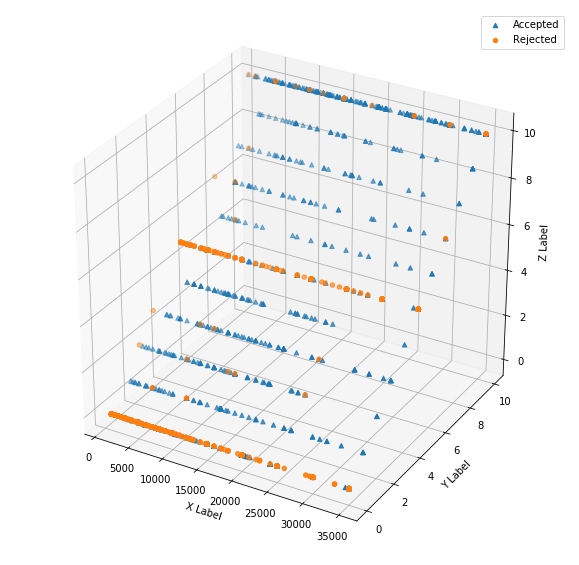

In [33]:
# Create a new pupose extractor
# convert all cases of purposes into a number ranging form 0 to 12
class PurposeNumExtractor(PurposeExtractor):
    def clean(self,entry):
        # We can call the parent class's function
        purposes=['business', 'car', 'credit_card', 'debt_consolidation', 'home_improvement', 'house', 'major_purchase', 'medical', 'moving', 'other', 'vacation']
        entry=super(PurposeNumExtractor,self).clean(entry)
        return purposes.index(entry)


import matplotlib.pyplot as plt  
from mpl_toolkits.mplot3d import Axes3D
import numpy as np     

def exclude_empty(X,Y,Z):
    filtered_x=[]
    filtered_y=[]
    filtered_z=[]
    
    for index in range(0,len(X)):
        x=X[index]
        y=Y[index]
        z=Y[index]
        
        # both x, y need to be valid
        # ignore those empty entries
        
        if x is None or y is None or z is None:
            continue
        
        # We notice there are a few entries with very high loan values
        # The are called the outliers, let's manually remove them 
        
        if x>39000:
            continue
        else:
            filtered_x.append(x)
            filtered_y.append(y)
            filtered_z.append(z)
    # CHALLENGE
    # use zip() function to simplify this loop
    # https://www.programiz.com/python-programming/methods/built-in/zip
    
    # convert it into numpy array to take advantage of numpy functions
    filtered_x=np.array(filtered_x)
    filtered_y=np.array(filtered_y)
    filtered_z=np.array(filtered_z)
    return filtered_x, filtered_y, filtered_z

emp_a=EmploymentExtractor('A','emp_length')
amnt_a=NumberExtractor('A','loan_amnt')
purpose_a=PurposeNumExtractor('A','purpose')

emp_r=EmploymentExtractor('R','emp_length')
amnt_r=NumberExtractor('R','loan_amnt')
purpose_r=PurposeNumExtractor('R','purpose')


X1,Y1, Z1=exclude_empty(amnt_a.data,emp_a.data,purpose_a.data)
X2,Y2, Z2=exclude_empty(amnt_r.data,emp_r.data,purpose_r.data)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')

ax.scatter(X1, Y1, Z1, label="Accepted",marker='^')
ax.scatter(X2, Y2, Z2, label="Rejected",)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.legend()
plt.show()

In [ ]:
from sklearn.cluster import KMeans